# First analysis of CMIP6 data

The CMIP6 data is monthly and given on a x,y grid

In [1]:
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
#import xesmf as xe

In [2]:
path = '/projects/0/einf2878/ROMS/data/CMIP6'
model = 'CNRM-ESM2-1'
variable = 'zos'

# Import CMIP6 data
data_126 = xr.open_dataset(f'{path}/{model}/{variable}_Omon_CNRM-ESM2-1_ssp126_r1i1p1f2_gn_201501-210012.nc')
data_245 = xr.open_dataset(f'{path}/{model}/{variable}_Omon_CNRM-ESM2-1_ssp245_r1i1p1f2_gn_201501-210012.nc')
data_585 = xr.open_dataset(f'{path}/{model}/{variable}_Omon_CNRM-ESM2-1_ssp585_r1i1p1f2_gn_201501-210012.nc')


# Import data
data_type = 'SODA'
path = '/projects/0/einf2878/ROMS/data'
soda_tg = pd.read_csv(f'{path}/{data_type}/roms_output/old_run/complete_run/processed_data/ssh_tidegauges.csv', index_col = 'time', usecols=['time', 'ocdyn'])


In [3]:
soda_tg

,ocdyn
time,
1980,-0.414986
1981,-0.416740
1982,-0.410305
1983,-0.401826
1984,-0.426721
1985,-0.456728
1986,-0.427041
1987,-0.461731
1988,-0.394643


In [4]:
data_126

<xarray.Dataset>
Dimensions:      (y: 294, x: 362, nvertex: 4, time: 1032, axis_nbounds: 2)
Coordinates:
    lat          (y, x) float64 ...
    lon          (y, x) float64 ...
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_lon   (y, x, nvertex) float64 ...
    bounds_lat   (y, x, nvertex) float64 ...
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    zos          (time, y, x) float32 ...
Attributes: (12/52)
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-08-16T09:45:23Z
    description:            Future scenario with low radiative forcing by the...
    title:                  CNRM-ESM2-1 model output prepared for CMIP6 / Sce...
    activity_id:            ScenarioMIP
    contact:                contact.cmip@meteo.fr
    ...                     ...
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    branch_time_in_parent:  60265.0
    branch_time_in_child:   60265.0
    history:                none
    tracking_id:            hdl:21.14100/45e02dc2-3338-4523-b469-0dcaeaf461ac

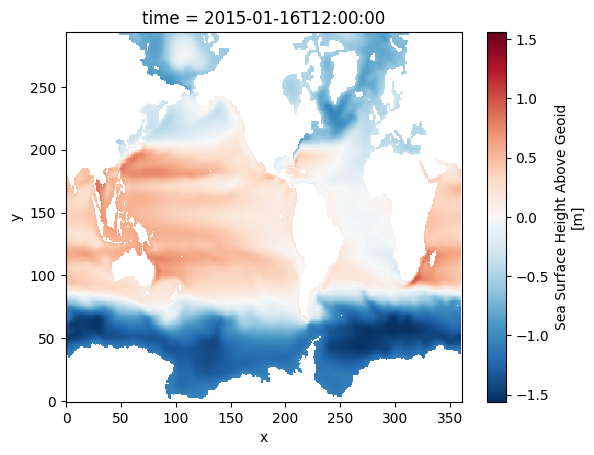

In [5]:
data_126.isel(time=0).zos.plot()

In [6]:
data_126.x

<xarray.DataArray 'x' (x: 362)>
array([  0,   1,   2, ..., 359, 360, 361])
Dimensions without coordinates: x

In [7]:
# Select smaller area
data_126_nwes = data_126.where((data_126.x > 270) & (data_126.x < 295) & (data_126.y > 200) & (data_126.y < 240), drop = True)

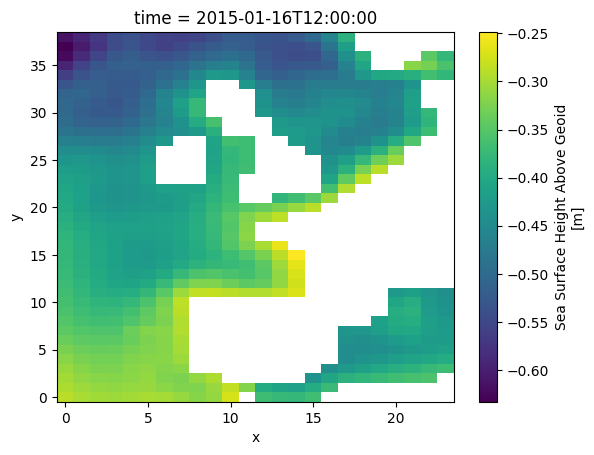

In [8]:
data_126_nwes.isel(time=0).zos.plot()

In [9]:
lat = float(data_126_nwes.sel(x=18, y=23).lat.data)
lon = float(data_126_nwes.sel(x=18, y=23).lon.data)
print(lat,lon)

51.38067626953125 3.089801549911499


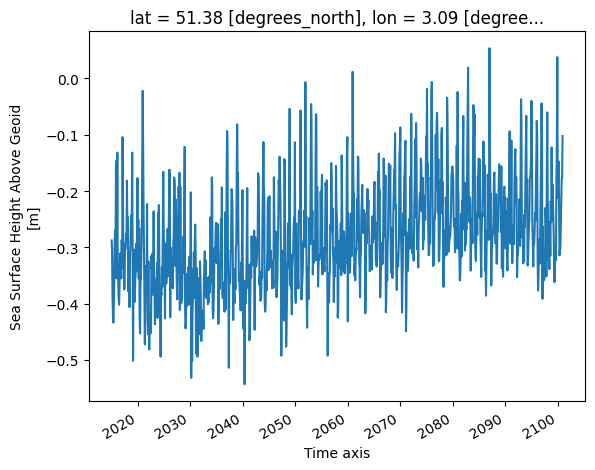

In [10]:
data_126.where((data_126.lat == lat) & (data_126.lon == lon), drop = True).zos.plot()

In [11]:
data_126_zos = data_126.where((data_126.lat == lat) & (data_126.lon == lon), drop = True).zos
data_245_zos = data_245.where((data_245.lat == lat) & (data_245.lon == lon), drop = True).zos
data_585_zos = data_585.where((data_585.lat == lat) & (data_585.lon == lon), drop = True).zos

In [12]:
# Obtain annual averages
data_126_zos_annual = data_126_zos.groupby(data_126_zos.time.dt.year).mean('time', keep_attrs = True).rename({'year':'time'})
data_245_zos_annual = data_245_zos.groupby(data_245_zos.time.dt.year).mean('time', keep_attrs = True).rename({'year':'time'})
data_585_zos_annual = data_585_zos.groupby(data_585_zos.time.dt.year).mean('time', keep_attrs = True).rename({'year':'time'})

In [13]:
data_126_zos_annual

<xarray.DataArray 'zos' (time: 86, y: 1, x: 1)>
array([[[-0.32751474]],

       [[-0.3230499 ]],

       [[-0.2772959 ]],

       [[-0.29240698]],

       [[-0.33602855]],

       [[-0.2917679 ]],

       [[-0.3374474 ]],

       [[-0.39253616]],

       [[-0.35386395]],

       [[-0.33763278]],

...

       [[-0.23529558]],

       [[-0.260824  ]],

       [[-0.2235973 ]],

       [[-0.21545045]],

       [[-0.22932924]],

       [[-0.23212926]],

       [[-0.29091403]],

       [[-0.23961915]],

       [[-0.23899263]],

       [[-0.21680649]]], dtype=float32)
Coordinates:
    lat      (y, x) float64 51.38
    lon      (y, x) float64 3.09
  * time     (time) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_surface_height_above_geoid
    long_name:           Sea Surface Height Above Geoid
    units:               m
    online_operation:    average
    cell_methods:        area: mean where sea time: mean
    interval_operation:  1800 s
    interval_write:      1 month
    description:         This is the dynamic sea level, so should have zero g...
    history:             none
    cell_measures:       area: areacello

In [14]:
# Obtain anomaly for 1993
soda_tg = soda_tg - soda_tg.loc[1993]


In [15]:
# Obtain anomaly to 2015 reanalysis data
diff_126 = float(data_126_zos_annual.sel(time=2015)) - float(soda_tg.loc[2015])
data_126_zos_annual = data_126_zos_annual - diff_126

diff_245 = float(data_245_zos_annual.sel(time=2015)) - float(soda_tg.loc[2015])
data_245_zos_annual = data_245_zos_annual - diff_245

diff_585 = float(data_585_zos_annual.sel(time=2015)) - float(soda_tg.loc[2015])
data_585_zos_annual = data_585_zos_annual - diff_585

In [16]:
# convert to cm
soda_tg['ocdyn'] = soda_tg['ocdyn']*100
data_126_zos_annual = data_126_zos_annual*100
data_245_zos_annual = data_245_zos_annual*100
data_585_zos_annual = data_585_zos_annual*100

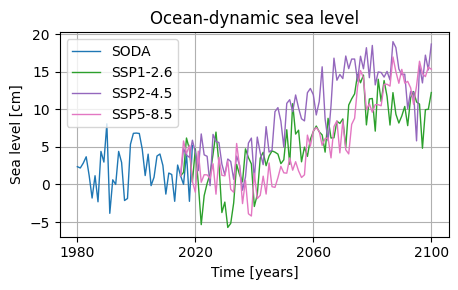

In [20]:
# Create figure
plt.figure(figsize = (4.7,3))

soda_tg['ocdyn'].plot(color = 'tab:blue', label = 'SODA', linewidth=1)
data_126_zos_annual.plot(color = 'tab:green', label = 'SSP1-2.6', linewidth=1)
data_245_zos_annual.plot(color = 'tab:purple', label = 'SSP2-4.5', linewidth=1)
data_585_zos_annual.plot(color = 'tab:pink', label = 'SSP5-8.5', linewidth=1)

plt.title('Ocean-dynamic sea level')
plt.ylabel('Sea level [cm]')
plt.xlabel('Time [years]')
plt.xticks(range(1980, 2101, 40))

plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig(f'/projects/0/einf2878/ROMS/figures/CMIP6/cmip6_{model}_{data_type}.png', dpi = 150)